In [2]:
import pandas as pd
import numpy as np
import wandb
from dieboldmariano import dm_test
from datetime import date
from dateutil.relativedelta import relativedelta
import torch
import seaborn as sns

In [2]:
dates = []
start_date = date(2014, 2, 1)
for i in range(10):
    for j in range(12):
        dates.append(f"Predictions_{(start_date + relativedelta(years=i, months=j)).strftime('%Y-%m-%d')}" +
                     f"_{(start_date + relativedelta(years=i, months=j + 1)).strftime('%Y-%m-%d')}:latest")

In [3]:
dates = dates[:-4]

In [4]:
len(dates)

116

In [55]:
api = wandb.Api()

In [6]:
dfs = []
for d in dates:
    dfs.append(api.artifact(f'tft-spx/cross_validate/{d}').get('predictions').get_dataframe())
df = pd.concat(dfs)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downlo

In [3]:
df = pd.read_hdf('preds.h5', 'data')

In [13]:
for m in models:
    df[f"{m}_err"] = df['Target'] - df[m]
    df[f"{m}_sqr_err"] = (df['Target'] - df[m])**2
    df[f"{m}_abs_err"] = np.abs(df['Target'] - df[m])

In [82]:
from datetime import datetime

per_month = []

for k, t in iter(df.groupby((df['Date'].dt.strftime('%Y-%m')))):
    period = datetime.strptime(k, '%Y-%m').strftime('%Y %b')
    per_month.append([period, *[np.sqrt(t[f"{x}_sqr_err"].mean()) for x in models]])

all_periods = pd.DataFrame(per_month, None, ['Period', *models])

In [86]:
all_periods

,Period,BS,MLP,LSTM,TFT
0,2014 Feb,18.492431,3.953423,4.465367,3.085144
1,2014 Mar,17.796791,7.442045,3.483222,1.953789
2,2014 Apr,18.153936,3.197548,3.186768,2.005324
3,2014 May,17.032013,2.233417,3.771717,2.654330
4,2014 Jun,18.283501,3.153836,4.003050,2.100310
...,...,...,...,...,...
111,2023 May,53.063949,7.486911,7.936402,9.972973
112,2023 Jun,44.369599,7.676493,6.312182,11.737850
113,2023 Jul,45.297994,7.795661,7.081051,10.797031
114,2023 Aug,50.420794,8.397332,7.700276,6.626550


In [92]:
for y, x in all_periods.groupby(pd.DatetimeIndex(all_periods['Period']).year):
    print(x.to_latex(index=False, float_format='%.2f', position='htpb', caption=f"RMSE for all individual testing periods in {y}", label=f"table:{y}results"))

\begin{table}[htpb]
\caption{RMSE for all individual testing periods in 2014}
\label{table:2014results}
\begin{tabular}{lrrrr}
\toprule
Period & BS & MLP & LSTM & TFT \\
\midrule
2014 Feb & 18.49 & 3.95 & 4.47 & 3.09 \\
2014 Mar & 17.80 & 7.44 & 3.48 & 1.95 \\
2014 Apr & 18.15 & 3.20 & 3.19 & 2.01 \\
2014 May & 17.03 & 2.23 & 3.77 & 2.65 \\
2014 Jun & 18.28 & 3.15 & 4.00 & 2.10 \\
2014 Jul & 20.99 & 3.54 & 3.96 & 2.77 \\
2014 Aug & 20.67 & 3.74 & 8.37 & 3.31 \\
2014 Sep & 18.88 & 3.14 & 6.16 & 2.51 \\
2014 Oct & 22.16 & 12.73 & 4.86 & 6.85 \\
2014 Nov & 18.64 & 8.89 & 4.22 & 3.14 \\
2014 Dec & 22.71 & 7.04 & 4.71 & 5.50 \\
\bottomrule
\end{tabular}
\end{table}

\begin{table}[htpb]
\caption{RMSE for all individual testing periods in 2015}
\label{table:2015results}
\begin{tabular}{lrrrr}
\toprule
Period & BS & MLP & LSTM & TFT \\
\midrule
2015 Jan & 25.00 & 5.12 & 4.14 & 4.36 \\
2015 Feb & 21.81 & 4.36 & 2.92 & 3.03 \\
2015 Mar & 19.67 & 3.38 & 4.76 & 4.13 \\
2015 Apr & 19.09 & 3.08 & 3.

In [93]:
from datetime import datetime

per_month = []

for k, t in iter(df.groupby((df['Date'].dt.strftime('%Y-%m')))):
    period = datetime.strptime(k, '%Y-%m').strftime('%Y %b')
    per_month.append([period, *[t[f"{x}_err"].mean() for x in models]])

all_periods_me = pd.DataFrame(per_month, None, ['Period', *models])

In [94]:
all_periods_me

,Period,BS,MLP,LSTM,TFT
0,2014 Feb,4.093157,1.433293,1.980275,1.247510
1,2014 Mar,4.442625,-0.803589,1.321447,0.166949
2,2014 Apr,3.382192,-1.315029,-1.240666,-0.875437
3,2014 May,2.151426,-0.488853,-1.140674,-1.469863
4,2014 Jun,2.294609,1.550867,-0.346130,-0.636153
...,...,...,...,...,...
111,2023 May,28.838655,-1.671920,-4.013959,-3.288197
112,2023 Jun,21.231958,-1.838230,-3.773292,-7.388054
113,2023 Jul,21.101494,4.501980,3.824737,-4.073021
114,2023 Aug,25.796824,4.486185,4.375191,3.347749


In [113]:
def MSE(t, a):
    return ((t - a)**2).mean()

def RMSE(t, a):
    return np.sqrt(MSE(t, a))

def MAE(t, a):
    return (np.abs(t - a)).mean()

def MAPE(t, a):
    return np.abs((t-a)/(t + 1e-9)).mean()

def ME(t, a):
    return (a - t).mean()

In [114]:
funcs = {
    'MSE': MSE, 'RMSE': RMSE, 'MAE': MAE, 'MAPE': MAPE, 'ME': ME
}

In [29]:
models = ['BS', 'MLP', 'LSTM', 'TFT']
target = 'Target'
metrics = ['RMSE', 'MAE', 'ME']

In [117]:
errors = pd.DataFrame(np.zeros((len(models), len(metrics))),index=models, columns=metrics)

In [118]:
for m in models:
    for e in metrics:
        errors[e][m] = funcs[e](df[target].to_numpy(), df[m].to_numpy())

In [119]:
print(errors.to_latex(float_format="%.2f"))

\begin{tabular}{lrrr}
\toprule
 & RMSE & MAE & ME \\
\midrule
BS & 53.36 & 27.13 & -23.66 \\
MLP & 14.94 & 8.27 & -1.21 \\
LSTM & 11.89 & 6.61 & 0.72 \\
TFT & 12.77 & 7.16 & -0.38 \\
\bottomrule
\end{tabular}



In [98]:
df

,S,K,T,r,30RV,Target,MLP,LSTM,TFT,BS,...,MLP_err,MLP_sqr_err,MLP_abs_err,LSTM_err,LSTM_sqr_err,LSTM_abs_err,TFT_err,TFT_sqr_err,TFT_abs_err,Moneyness
0,1741.95,1625.0,0.276598,0.045641,0.007918,138.645,127.532349,134.942383,129.931747,1.171551e+02,...,11.112651,123.491020,11.112651,3.702617,13.709374,3.702617,8.713253,75.920770,8.713253,1.071969
1,1741.95,1650.0,0.276598,0.045641,0.007918,119.195,107.143677,116.238831,109.353226,9.215829e+01,...,12.051323,145.234392,12.051323,2.956169,8.738938,2.956169,9.841774,96.860521,9.841774,1.055727
2,1741.95,1675.0,0.276598,0.045641,0.007918,100.700,88.903595,96.988815,89.971222,6.716144e+01,...,11.796405,139.155172,11.796405,3.711185,13.772892,3.711185,10.728778,115.106679,10.728778,1.039970
3,1741.95,1700.0,0.276598,0.045641,0.007918,82.990,72.304504,77.622353,72.143166,4.216460e+01,...,10.685496,114.179816,10.685496,5.367647,28.811639,5.367647,10.846834,117.653817,10.846834,1.024676
4,1741.95,1225.0,0.276598,0.045641,0.007918,510.445,510.841675,507.173462,507.015076,5.171046e+02,...,-0.396675,0.157351,0.396675,3.271538,10.702961,3.271538,3.429924,11.764381,3.429924,1.422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146474,4286.60,4565.0,0.057534,3.903676,0.007635,0.775,0.020000,1.564716,2.200524,1.215953e-241,...,0.755000,0.570025,0.755000,-0.789716,0.623651,0.789716,-1.425524,2.032118,1.425524,0.939014
146475,4286.60,4570.0,0.057534,3.903676,0.007635,0.700,0.020000,1.519044,2.091953,2.459641e-250,...,0.680000,0.462400,0.680000,-0.819044,0.670833,0.819044,-1.391953,1.937534,1.391953,0.937987
146476,4286.60,4575.0,0.057534,3.903676,0.007635,0.600,0.020000,1.473413,1.981027,3.561933e-259,...,0.580000,0.336400,0.580000,-0.873413,0.762850,0.873413,-1.381027,1.907237,1.381027,0.936962
146477,4286.60,4545.0,0.057534,3.903676,0.007635,1.175,0.020000,1.884295,2.782118,2.512496e-208,...,1.155000,1.334025,1.155000,-0.709295,0.503100,0.709295,-1.607118,2.582827,1.607118,0.943146


In [103]:
rmse_over_years = np.sqrt(df.groupby(df['Date'].dt.year).mean()[[f"{x}_sqr_err" for x in models]])

In [104]:
rmse_over_years.columns = models

In [120]:
print(rmse_over_years.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
 & BS & MLP & LSTM & TFT \\
Date &  &  &  &  \\
\midrule
2014 & 19.77 & 6.64 & 4.92 & 3.82 \\
2015 & 21.47 & 8.70 & 4.42 & 4.30 \\
2016 & 20.78 & 6.68 & 3.60 & 6.54 \\
2017 & 17.57 & 4.01 & 3.94 & 5.89 \\
2018 & 26.33 & 11.18 & 5.60 & 10.95 \\
2019 & 28.04 & 7.89 & 6.51 & 8.60 \\
2020 & 64.75 & 30.32 & 23.84 & 22.51 \\
2021 & 68.90 & 14.77 & 12.15 & 13.27 \\
2022 & 85.78 & 16.00 & 13.96 & 15.72 \\
2023 & 54.19 & 9.48 & 9.39 & 10.18 \\
\bottomrule
\end{tabular}



In [39]:
abs_over_years = - df.groupby(df['Date'].dt.year).mean()[[f"{x}_err" for x in models]]
abs_over_years.columns = models

In [40]:
print(abs_over_years.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
 & BS & MLP & LSTM & TFT \\
Date &  &  &  &  \\
\midrule
2014 & -4.68 & -1.53 & -1.34 & -0.90 \\
2015 & -6.85 & -1.59 & 0.03 & 0.23 \\
2016 & -5.54 & 1.64 & -0.11 & -1.10 \\
2017 & -3.35 & -0.37 & 0.01 & 0.54 \\
2018 & -9.66 & 1.60 & 0.94 & 2.27 \\
2019 & -9.09 & -0.32 & -0.23 & -2.26 \\
2020 & -36.19 & -5.15 & 0.16 & -2.22 \\
2021 & -36.61 & -4.87 & 0.63 & -1.15 \\
2022 & -51.61 & 1.49 & 3.21 & -0.70 \\
2023 & -28.48 & -0.91 & 1.36 & 2.18 \\
\bottomrule
\end{tabular}



In [106]:
errors

NameError: name 'errors' is not defined

In [125]:
dm = pd.DataFrame(np.zeros((len(models), len(models))),index=models, columns=models)
dm_p = pd.DataFrame(np.zeros((len(models), len(models))),index=models, columns=models)

In [341]:
for m in models:
    for x in models:
        if m == x:
            pass
        else:
            dm[m][x], dm_p[m][x] = dm_test(atm[target], atm[m], atm[x], h=1, harvey_correction=True)

In [342]:
print(dm.to_latex(float_format=lambda x: f"{x:.2f}"))

\begin{tabular}{lrrrr}
\toprule
 & BS & MLP & LSTM & TFT \\
\midrule
BS & 0.00 & -944.52 & -964.17 & -959.95 \\
MLP & 944.52 & 0.00 & -83.14 & -41.88 \\
LSTM & 964.17 & 83.14 & 0.00 & 11.05 \\
TFT & 959.95 & 41.88 & -11.05 & 0.00 \\
\bottomrule
\end{tabular}



In [319]:
dm_p

,BS,MLP,LSTM,TFT
BS,0.0,0.0,0.000000e+00,0.000000e+00
MLP,0.0,0.0,0.000000e+00,0.000000e+00
LSTM,0.0,0.0,0.000000e+00,3.291339e-07
TFT,0.0,0.0,3.291339e-07,0.000000e+00


In [72]:
errors.style.apply(lambda row: ['font-weight:bold' if x==row.min() else '' for x in row], axis=0)

,RMSE,MAE,MAPE
BS,18.383989,9.982319,0.294824
MLP,2.468415,1.761468,0.358224
LSTM,2.415884,1.857252,0.557952
TFT,2.315361,1.812841,1.967737


In [67]:
errors.to_latex(float_format="%.2f")

'\\begin{tabular}{lrrr}\n\\toprule\n & RMSE & MAE & MAPE \\\\\n\\midrule\nBS & 18.38 & 9.98 & 0.29 \\\\\nMLP & 2.47 & 1.76 & 0.36 \\\\\nLSTM & 2.42 & 1.86 & 0.56 \\\\\nTFT & 2.32 & 1.81 & 1.97 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [22]:
print(dm_p.to_latex(float_format=lambda x: f"<0.001" if x < 0.001 else f"{x:.2e}"))

\begin{tabular}{lrrrr}
\toprule
 & BS & MLP & LSTM & TFT \\
\midrule
BS & <0.001 & <0.001 & <0.001 & <0.001 \\
MLP & <0.001 & <0.001 & <0.001 & <0.001 \\
LSTM & <0.001 & <0.001 & <0.001 & <0.001 \\
TFT & <0.001 & <0.001 & <0.001 & <0.001 \\
\bottomrule
\end{tabular}



In [26]:
df['Moneyness'] = df['S'] / df['K']

In [354]:
otm = df[df['Moneyness'] < 0.97]
atm = df[(df['Moneyness'] >= 0.97) & (df['Moneyness'] <= 1.03)]
itm = df[(df['Moneyness'] > 1.03) & (df['Moneyness'] <= 1.75)]
eitm = df[df['Moneyness'] > 1.75]

In [46]:
len(otm)

3627694

In [30]:
df.to_hdf('preds.h5', 'data')

In [344]:
moneyness_errs = pd.DataFrame(np.zeros((4, len(models))), index=['OTM', 'ATM', 'ITM', 'EITM'], columns=models)

In [355]:
for m in models:
        moneyness_errs[m]['OTM'] = RMSE(otm['Target'], otm[m])
for m in models:
        moneyness_errs[m]['ATM'] = RMSE(atm['Target'], atm[m])
for m in models:
        moneyness_errs[m]['ITM'] = RMSE(itm['Target'], itm[m])
for m in models:
        moneyness_errs[m]['EITM'] = RMSE(eitm['Target'], eitm[m])

In [356]:
moneyness_errs

,MLP,LSTM,TFT
OTM,14.920940,10.975545,12.683605
ATM,18.926716,14.198630,14.575876
ITM,13.609096,11.420728,11.733799
EITM,12.005758,12.230335,19.988575


In [145]:
short = df[df['T'] < 1/12]
medium = df[(df['T'] >= 1/12) & (df['T'] <= 1/2)]
long = df[df['T'] > 1/2]

In [66]:
len(long)

1627656

In [146]:
ttm_errs = pd.DataFrame(np.zeros((3, len(models))), index=['short', 'medium', 'long'], columns=models)
for m in models:
        ttm_errs[m]['short'] = RMSE(short['Target'], short[m])
for m in models:
        ttm_errs[m]['medium'] = RMSE(medium['Target'], medium[m])
for m in models:
        ttm_errs[m]['long'] = RMSE(long['Target'], long[m])

In [147]:
ttm_errs

,BS,MLP,LSTM,TFT
short,17.704277,12.067521,8.849859,10.046100
medium,49.312000,15.235186,12.147854,11.785729
long,108.095543,20.507675,17.503786,20.652887


/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1365123899.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models)


[Text(0, 0, 'BS'), Text(1, 0, 'MLP'), Text(2, 0, 'LSTM'), Text(3, 0, 'TFT')]

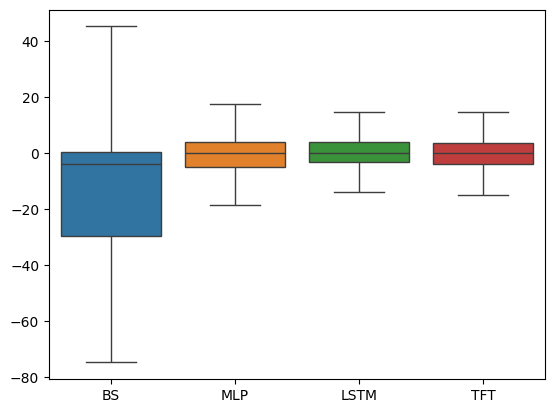

In [622]:
ax = sns.boxplot(df[[f"{x}_err" for x in models]], showfliers=False)
ax.set_xticklabels(models)

In [26]:
from copy import deepcopy

In [27]:
box_df = deepcopy(df)
box_df['Year'] = box_df['Date'].dt.year

In [30]:
models

['BS', 'MLP', 'LSTM', 'TFT']

In [31]:
(box_df['BS'] - box_df['Target']).mean()

-23.656200124899335

In [32]:
box_df[[f"{x}_err" for x in models]].mean()

BS_err      23.656200
MLP_err      1.208587
LSTM_err    -0.724797
TFT_err      0.379326
dtype: float64

In [33]:
box_df[[f"{x}_err" for x in models]] = -box_df[[f"{x}_err" for x in models]]

In [371]:
models = ['BS', 'MLP', 'LSTM', 'TFT']

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BS')

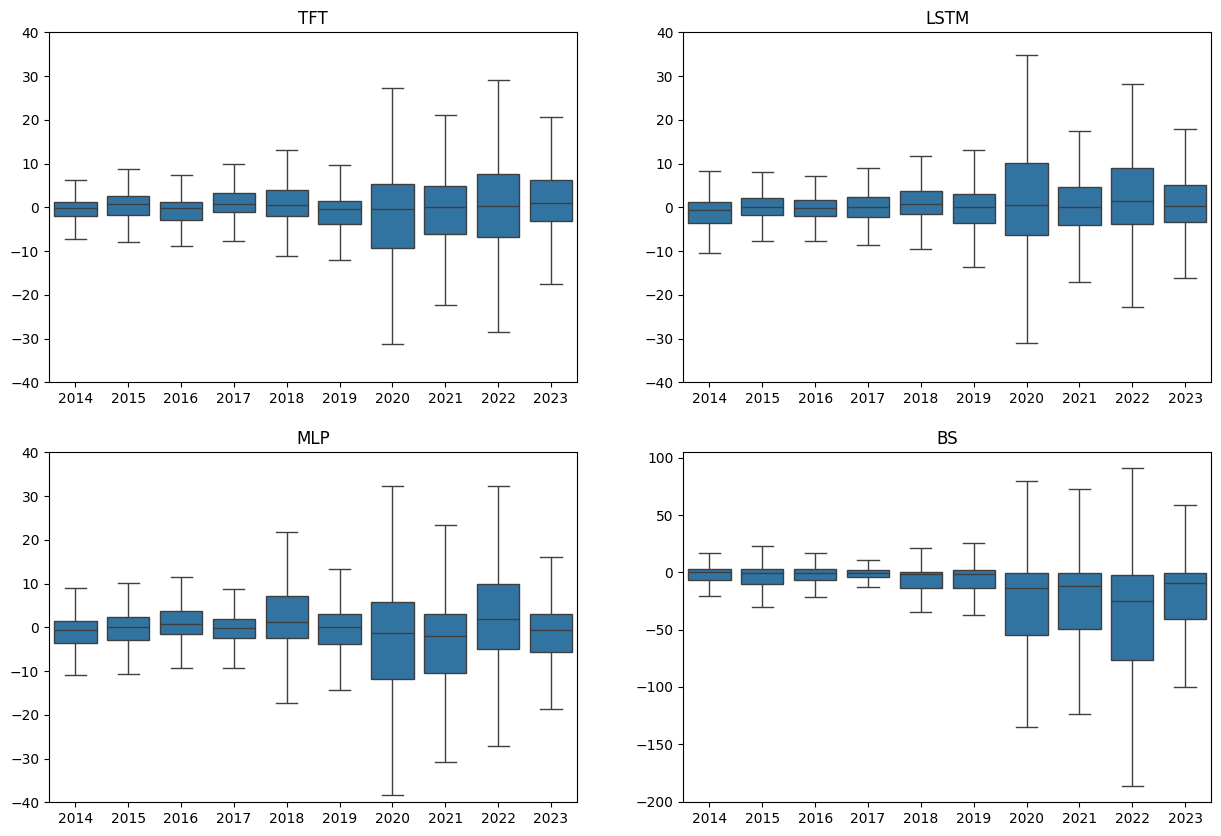

In [36]:
fig, ax = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
a = sns.boxplot(box_df, x='Year', y='TFT_err', showfliers=False, ax=ax[0][0])
a.set_ylabel('')
a.set_xlabel(None)
a.set_title('TFT')
a.set_ybound(-40, 40)
a = sns.boxplot(box_df, x='Year', y='LSTM_err', showfliers=False, ax=ax[0][1])
a.set_ylabel('')
a.set_xlabel(None)
a.set_title('LSTM')
a.set_ybound(-40, 40)
a = sns.boxplot(box_df, x='Year', y='MLP_err', showfliers=False, ax=ax[1][0])
a.set_ylabel('')
a.set_xlabel(None)
a.set_title('MLP')
a.set_ybound(-40, 40)
a = sns.boxplot(box_df, x='Year', y='BS_err', showfliers=False, ax=ax[1][1])
a.set_ylabel('')
a.set_xlabel(None)
a.set_title('BS')

In [16]:
print(box_df[box_df['Year'] == 2020][[f"{x}_err" for x in models]].describe().to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
 & BS_err & MLP_err & LSTM_err & TFT_err \\
\midrule
count & 1454757.00 & 1454757.00 & 1454757.00 & 1454757.00 \\
mean & -36.19 & -5.15 & 0.16 & -2.22 \\
std & 53.69 & 29.88 & 23.84 & 22.40 \\
min & -393.86 & -242.21 & -198.65 & -167.21 \\
25% & -54.36 & -11.84 & -6.33 & -9.37 \\
50% & -13.71 & -1.20 & 0.59 & -0.29 \\
75% & -0.57 & 5.84 & 10.08 & 5.25 \\
max & 659.35 & 643.59 & 674.74 & 598.27 \\
\bottomrule
\end{tabular}



In [328]:
from copy import deepcopy
bar_df = deepcopy(df)
bar_df['bin'] = pd.cut(bar_df['Moneyness'], bins=np.arange(0.8, 2.01, 0.005))

In [5]:
bar_df

,S,K,T,r,30RV,Target,MLP,LSTM,TFT,BS,...,MLP_sqr_err,MLP_abs_err,LSTM_err,LSTM_sqr_err,LSTM_abs_err,TFT_err,TFT_sqr_err,TFT_abs_err,Moneyness,bin
0,1741.95,1625.0,0.276598,0.045641,0.007918,138.645,127.532349,134.942383,129.931747,1.171551e+02,...,123.491020,11.112651,3.702617,13.709374,3.702617,8.713253,75.920770,8.713253,1.071969,"(1.05, 1.1]"
1,1741.95,1650.0,0.276598,0.045641,0.007918,119.195,107.143677,116.238831,109.353226,9.215829e+01,...,145.234392,12.051323,2.956169,8.738938,2.956169,9.841774,96.860521,9.841774,1.055727,"(1.05, 1.1]"
2,1741.95,1675.0,0.276598,0.045641,0.007918,100.700,88.903595,96.988815,89.971222,6.716144e+01,...,139.155172,11.796405,3.711185,13.772892,3.711185,10.728778,115.106679,10.728778,1.039970,"(1.0, 1.05]"
3,1741.95,1700.0,0.276598,0.045641,0.007918,82.990,72.304504,77.622353,72.143166,4.216460e+01,...,114.179816,10.685496,5.367647,28.811639,5.367647,10.846834,117.653817,10.846834,1.024676,"(1.0, 1.05]"
4,1741.95,1225.0,0.276598,0.045641,0.007918,510.445,510.841675,507.173462,507.015076,5.171046e+02,...,0.157351,0.396675,3.271538,10.702961,3.271538,3.429924,11.764381,3.429924,1.422000,"(1.4, 1.45]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146474,4286.60,4565.0,0.057534,3.903676,0.007635,0.775,0.020000,1.564716,2.200524,1.215953e-241,...,0.570025,0.755000,-0.789716,0.623651,0.789716,-1.425524,2.032118,1.425524,0.939014,"(0.9, 0.95]"
146475,4286.60,4570.0,0.057534,3.903676,0.007635,0.700,0.020000,1.519044,2.091953,2.459641e-250,...,0.462400,0.680000,-0.819044,0.670833,0.819044,-1.391953,1.937534,1.391953,0.937987,"(0.9, 0.95]"
146476,4286.60,4575.0,0.057534,3.903676,0.007635,0.600,0.020000,1.473413,1.981027,3.561933e-259,...,0.336400,0.580000,-0.873413,0.762850,0.873413,-1.381027,1.907237,1.381027,0.936962,"(0.9, 0.95]"
146477,4286.60,4545.0,0.057534,3.903676,0.007635,1.175,0.020000,1.884295,2.782118,2.512496e-208,...,1.334025,1.155000,-0.709295,0.503100,0.709295,-1.607118,2.582827,1.607118,0.943146,"(0.9, 0.95]"


In [23]:
bar_df.groupby('bin').mean()

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1842176211.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_df.groupby('bin').mean()


,S,K,T,r,30RV,Target,MLP,LSTM,TFT,BS,...,MLP_err,MLP_sqr_err,MLP_abs_err,LSTM_err,LSTM_sqr_err,LSTM_abs_err,TFT_err,TFT_sqr_err,TFT_abs_err,Moneyness
bin,,,,,,,,,,,,,,,,,,,,,
"(0.8, 0.85]",3370.966745,4077.210914,0.396884,1.398508,0.014236,10.539742,12.378977,10.868171,11.836832,0.000141,...,-1.839235,128.363848,6.025336,-0.328430,63.194758,3.809197,-1.297091,128.827214,5.265597,0.827162
"(0.85, 0.9]",3311.708522,3773.381028,0.336927,1.299840,0.012449,18.277700,19.020422,18.537488,18.176355,0.001676,...,-0.742722,187.617160,6.812671,-0.259788,100.490677,4.814583,0.101345,148.538662,5.611866,0.877869
"(0.9, 0.95]",3288.890484,3544.622433,0.245183,1.164766,0.010475,26.138865,25.949557,26.559756,25.645781,0.090891,...,0.189308,232.123889,7.324550,-0.420892,125.836143,5.487959,0.493084,162.590222,5.835154,0.928137
"(0.95, 1.0]",3320.623642,3404.057626,0.186436,1.171057,0.009689,50.247545,48.801626,50.885239,49.670673,2.663168,...,1.445919,321.312696,9.952585,-0.637694,180.155365,7.661896,0.576872,202.807589,7.810967,0.975579
"(1.0, 1.05]",3352.697147,3273.292363,0.179764,1.210097,0.009715,140.299567,136.814565,140.617404,140.320469,89.511613,...,3.485001,350.829778,11.328853,-0.317837,195.541639,8.547890,-0.020903,196.673415,8.788435,1.024485
"(1.05, 1.1]",3296.985857,3070.710273,0.190703,1.132872,0.009641,265.025674,262.996006,265.502082,265.137424,236.044574,...,2.029668,275.642545,9.649049,-0.476408,154.790844,7.317567,-0.111750,153.723366,7.495906,1.073981
"(1.1, 1.15]",3238.889923,2882.674930,0.210314,1.094238,0.009560,385.831728,384.819035,386.752595,385.682185,366.351049,...,1.012693,203.066981,8.435824,-0.920867,129.826070,6.634667,0.149543,138.182337,7.010615,1.123810
"(1.15, 1.2]",3206.554117,2732.039575,0.230213,1.072176,0.009549,498.257724,498.002994,499.518573,498.020163,484.885762,...,0.254730,156.485921,7.344652,-1.260849,115.999832,6.271512,0.237561,126.677590,6.670296,1.173912
"(1.2, 1.25]",3172.075587,2591.995433,0.253577,1.071183,0.009560,599.816988,599.756516,601.088706,599.499285,590.772547,...,0.060472,130.258650,6.719679,-1.271719,108.678899,5.957809,0.317703,118.296662,6.380615,1.223997


In [308]:
bar_df[['bin', 'TFT_err', 'LSTM_err']].melt(id_vars='bin')

,bin,variable,value
0,"(0.2, 0.3]",TFT_err,8.713253
1,"(0.2, 0.3]",TFT_err,9.841774
2,"(0.2, 0.3]",TFT_err,10.728778
3,"(0.2, 0.3]",TFT_err,10.846834
4,"(0.2, 0.3]",TFT_err,3.429924
...,...,...,...
23720063,"(0.0, 0.1]",LSTM_err,-0.789716
23720064,"(0.0, 0.1]",LSTM_err,-0.819044
23720065,"(0.0, 0.1]",LSTM_err,-0.873413
23720066,"(0.0, 0.1]",LSTM_err,-0.709295


In [307]:
df

,S,K,T,r,30RV,Target,MLP,LSTM,TFT,BS,...,MLP_err,MLP_sqr_err,MLP_abs_err,LSTM_err,LSTM_sqr_err,LSTM_abs_err,TFT_err,TFT_sqr_err,TFT_abs_err,Moneyness
0,1741.95,1625.0,0.276598,0.045641,0.007918,138.645,127.532349,134.942383,129.931747,1.171551e+02,...,11.112651,123.491020,11.112651,3.702617,13.709374,3.702617,8.713253,75.920770,8.713253,1.071969
1,1741.95,1650.0,0.276598,0.045641,0.007918,119.195,107.143677,116.238831,109.353226,9.215829e+01,...,12.051323,145.234392,12.051323,2.956169,8.738938,2.956169,9.841774,96.860521,9.841774,1.055727
2,1741.95,1675.0,0.276598,0.045641,0.007918,100.700,88.903595,96.988815,89.971222,6.716144e+01,...,11.796405,139.155172,11.796405,3.711185,13.772892,3.711185,10.728778,115.106679,10.728778,1.039970
3,1741.95,1700.0,0.276598,0.045641,0.007918,82.990,72.304504,77.622353,72.143166,4.216460e+01,...,10.685496,114.179816,10.685496,5.367647,28.811639,5.367647,10.846834,117.653817,10.846834,1.024676
4,1741.95,1225.0,0.276598,0.045641,0.007918,510.445,510.841675,507.173462,507.015076,5.171046e+02,...,-0.396675,0.157351,0.396675,3.271538,10.702961,3.271538,3.429924,11.764381,3.429924,1.422000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146474,4286.60,4565.0,0.057534,3.903676,0.007635,0.775,0.020000,1.564716,2.200524,1.215953e-241,...,0.755000,0.570025,0.755000,-0.789716,0.623651,0.789716,-1.425524,2.032118,1.425524,0.939014
146475,4286.60,4570.0,0.057534,3.903676,0.007635,0.700,0.020000,1.519044,2.091953,2.459641e-250,...,0.680000,0.462400,0.680000,-0.819044,0.670833,0.819044,-1.391953,1.937534,1.391953,0.937987
146476,4286.60,4575.0,0.057534,3.903676,0.007635,0.600,0.020000,1.473413,1.981027,3.561933e-259,...,0.580000,0.336400,0.580000,-0.873413,0.762850,0.873413,-1.381027,1.907237,1.381027,0.936962
146477,4286.60,4545.0,0.057534,3.903676,0.007635,1.175,0.020000,1.884295,2.782118,2.512496e-208,...,1.155000,1.334025,1.155000,-0.709295,0.503100,0.709295,-1.607118,2.582827,1.607118,0.943146


In [330]:
for m in models:
    bar_df[f"{m}_rmse"] = np.sqrt(bar_df[f"{m}_sqr_err"])

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/586694942.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks)


Text(0, 0.5, 'RMSE')

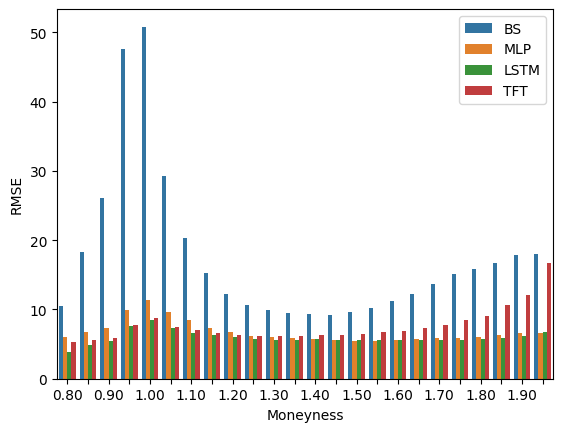

In [159]:
ax = sns.barplot(bar_df[['bin', *[f"{x}_rmse" for x in models]]].melt(id_vars='bin'), x='bin', y='value', hue='variable', errorbar=None)

x_ticks = [f"{x:.2f}" for x in np.arange(0.8, 2.0, 0.05)]
x_ticks = ['' if i % 2 != 0 else x for i, x in enumerate(x_ticks)]

ax.set_xticklabels(x_ticks)
ax.legend(models)
ax.set_xlabel('Moneyness')
ax.set_ylabel('RMSE')

In [184]:
line_df = bar_df[['bin', 'Moneyness', *[f"{x}_rmse" for x in models]]].groupby('bin').mean()

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/3585007029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  line_df = bar_df[['bin', 'Moneyness', *[f"{x}_rmse" for x in models]]].groupby('bin').mean()


In [190]:
line_df.melt(id_vars='Moneyness')

,Moneyness,variable,value
0,0.827162,BS_rmse,10.539601
1,0.877869,BS_rmse,18.276024
2,0.928137,BS_rmse,26.047974
3,0.975579,BS_rmse,47.584377
4,1.024485,BS_rmse,50.824074
...,...,...,...
91,1.774701,TFT_rmse,8.489862
92,1.824151,TFT_rmse,9.113691
93,1.875028,TFT_rmse,10.648231
94,1.924350,TFT_rmse,12.082460


In [357]:
m_line = bar_df[['bin', 'Moneyness', *[f"{x}_rmse" for x in models]]].groupby('bin').mean()
m_line.columns = ['Moneyness', *models]

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/856206215.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_line = bar_df[['bin', 'Moneyness', *[f"{x}_rmse" for x in models]]].groupby('bin').mean()


In [358]:
m_line = m_line[m_line['Moneyness'] > 1.03]
m_line = m_line[m_line['Moneyness'] < 1.75]

Text(0, 0.5, 'RMSE')

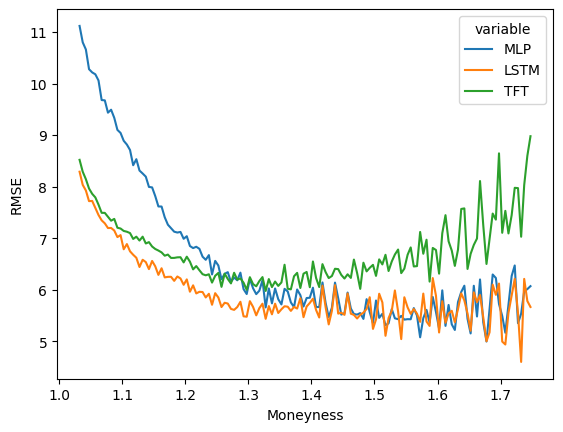

In [359]:
ax = sns.lineplot(m_line.melt('Moneyness'), x='Moneyness', y='value', hue='variable', legend='brief')

ax.set_xlabel('Moneyness')
ax.set_ylabel('RMSE')
# ax.set_yscale('log')

In [196]:
bar_df

,S,K,T,r,30RV,Target,MLP,LSTM,TFT,BS,...,LSTM_abs_err,TFT_err,TFT_sqr_err,TFT_abs_err,Moneyness,bin,BS_rmse,MLP_rmse,LSTM_rmse,TFT_rmse
0,1741.95,1625.0,0.276598,0.045641,0.007918,138.645,127.532349,134.942383,129.931747,1.171551e+02,...,3.702617,8.713253,75.920770,8.713253,1.071969,"(1.05, 1.1]",21.489869,11.112651,3.702617,8.713253
1,1741.95,1650.0,0.276598,0.045641,0.007918,119.195,107.143677,116.238831,109.353226,9.215829e+01,...,2.956169,9.841774,96.860521,9.841774,1.055727,"(1.05, 1.1]",27.036713,12.051323,2.956169,9.841774
2,1741.95,1675.0,0.276598,0.045641,0.007918,100.700,88.903595,96.988815,89.971222,6.716144e+01,...,3.711185,10.728778,115.106679,10.728778,1.039970,"(1.0, 1.05]",33.538557,11.796405,3.711185,10.728778
3,1741.95,1700.0,0.276598,0.045641,0.007918,82.990,72.304504,77.622353,72.143166,4.216460e+01,...,5.367647,10.846834,117.653817,10.846834,1.024676,"(1.0, 1.05]",40.825401,10.685496,5.367647,10.846834
4,1741.95,1225.0,0.276598,0.045641,0.007918,510.445,510.841675,507.173462,507.015076,5.171046e+02,...,3.271538,3.429924,11.764381,3.429924,1.422000,"(1.4, 1.45]",6.659637,0.396675,3.271538,3.429924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146474,4286.60,4565.0,0.057534,3.903676,0.007635,0.775,0.020000,1.564716,2.200524,1.215953e-241,...,0.789716,-1.425524,2.032118,1.425524,0.939014,"(0.9, 0.95]",0.775000,0.755000,0.789716,1.425524
146475,4286.60,4570.0,0.057534,3.903676,0.007635,0.700,0.020000,1.519044,2.091953,2.459641e-250,...,0.819044,-1.391953,1.937534,1.391953,0.937987,"(0.9, 0.95]",0.700000,0.680000,0.819044,1.391953
146476,4286.60,4575.0,0.057534,3.903676,0.007635,0.600,0.020000,1.473413,1.981027,3.561933e-259,...,0.873413,-1.381027,1.907237,1.381027,0.936962,"(0.9, 0.95]",0.600000,0.580000,0.873413,1.381027
146477,4286.60,4545.0,0.057534,3.903676,0.007635,1.175,0.020000,1.884295,2.782118,2.512496e-208,...,0.709295,-1.607118,2.582827,1.607118,0.943146,"(0.9, 0.95]",1.175000,1.155000,0.709295,1.607118


In [254]:
models = models[1:]

In [272]:
t_line = bar_df[['bin', 'T', *[f"{x}_err" for x in models]]].groupby('bin').mean()
t_line.columns = ['T', *models]

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/794513821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  t_line = bar_df[['bin', 'T', *[f"{x}_err" for x in models]]].groupby('bin').mean()


In [273]:
t_line['T'] = t_line['T'] * 365

Text(0, 0.5, 'RMSE')

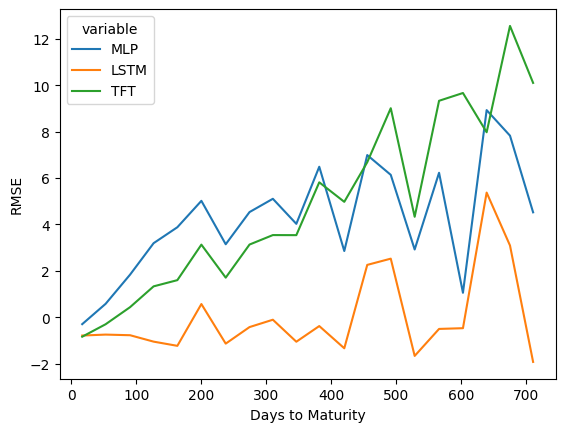

In [274]:
ax = sns.lineplot(t_line.melt('T'), x='T', y='value', hue='variable')

ax.set_xlabel('Days to Maturity')
ax.set_ylabel('RMSE')
# ax.set_yscale('log')

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/2309574925.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks)


Text(0, 0.5, 'MSE')

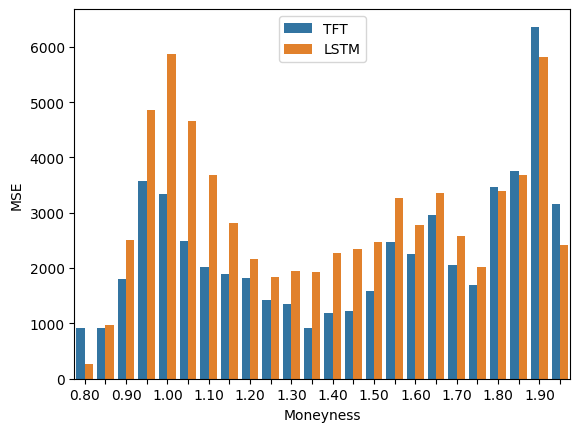

In [49]:
ax = sns.barplot(bar_df[(bar_df['Date'].dt.year == 2020) & (bar_df['Date'].dt.month == 3)][['bin', 'TFT_sqr_err', 'LSTM_sqr_err']].melt(id_vars='bin'), x='bin', y='value', hue='variable', errorbar=None)

x_ticks = [f"{x:.2f}" for x in np.arange(0.8, 2.0, 0.05)]
x_ticks = ['' if i % 2 != 0 else x for i, x in enumerate(x_ticks)]

ax.set_xticklabels(x_ticks)
ax.legend(['TFT', 'LSTM'])
ax.set_xlabel('Moneyness')
ax.set_ylabel('MSE')

In [384]:
df[[f"{x}_err" for x in models]] = - df[[f"{x}_err" for x in models]]

In [385]:
print(df[[f"{x}_err" for x in models]].describe(percentiles=[.25, .5, .75]).to_latex(float_format='%.2f'))

\begin{tabular}{lrrrr}
\toprule
 & BS_err & MLP_err & LSTM_err & TFT_err \\
\midrule
count & 11860034.00 & 11860034.00 & 11860034.00 & 11860034.00 \\
mean & -23.66 & -1.21 & 0.72 & -0.38 \\
std & 47.83 & 14.89 & 11.87 & 12.76 \\
min & -1260.00 & -1254.98 & -1241.00 & -1255.25 \\
25% & -29.69 & -4.91 & -3.04 & -3.82 \\
50% & -3.90 & -0.06 & 0.13 & 0.23 \\
75% & 0.31 & 4.03 & 4.03 & 3.54 \\
max & 1080.94 & 1040.56 & 1045.93 & 1028.56 \\
\bottomrule
\end{tabular}



In [68]:

tft_weights = api.artifact('tft-spx/cross_validate/tft_model_2021-06-01:latest')

In [69]:
tft_weights.download()

wandb:   1 of 1 files downloaded.  


'/Users/lavranssagen/school/Thesis/code/artifacts/tft_model_2021-06-01:v1'

In [9]:
import torch

In [10]:
tft_weights = torch.load('/Users/lavranssagen/school/Thesis/code/artifacts/tft_model_2018-01-01:v1/tft.pt')

In [11]:
tft_weights_good = torch.load('/Users/lavranssagen/school/Thesis/code/artifacts/tft_model_2016-04-01:v1/tft.pt')

In [12]:
tft_weights_covid = torch.load('/Users/lavranssagen/school/Thesis/code/artifacts/tft_model_2022-01-01:v0/tft.pt')

In [70]:
tft_weights_covid_good = torch.load('/Users/lavranssagen/school/Thesis/code/artifacts/tft_model_2021-06-01:v1/tft.pt')

In [5]:
from models import TFT

tft = TFT(64, 5, 0, 4, 2)

In [580]:
tft.load_state_dict(tft_weights_covid)

<All keys matched successfully>

In [6]:
tft.eval()
tft.to('mps')

TFT(
  (static_embedding): ContinuesEmbedding(
    (linear): Linear(in_features=1, out_features=64, bias=True)
  )
  (temporal_embedding): ContinuesEmbedding(
    (linear): Linear(in_features=1, out_features=64, bias=True)
  )
  (static_var_selection): StaticVarSelection(
    (grn_mask): StaticGRN(
      (net): Sequential(
        (0): Linear(in_features=320, out_features=64, bias=True)
        (1): ELU(alpha=1.0)
        (2): Linear(in_features=64, out_features=5, bias=True)
        (3): Dropout(p=0, inplace=False)
      )
      (linear): Linear(in_features=320, out_features=5, bias=True)
      (gnorm): GateAndNorm(
        (gate): Sequential(
          (0): Linear(in_features=5, out_features=5, bias=True)
          (1): Sigmoid()
        )
        (linear): Linear(in_features=5, out_features=5, bias=True)
        (norm): LayerNorm((5,), eps=1e-05, elementwise_affine=True)
      )
    )
    (grns): ModuleList(
      (0-4): 5 x GRNNoContext(
        (net): Sequential(
          (0): Li

In [2]:
import torch.utils
import torch.utils.data
from utils import get_tft_data
from datasets import LSTMDataset

a, b, c =  get_tft_data(date(2013, 3, 1), date(2016, 3, 1), 140)

r, s, t = get_tft_data(date(2016, 4, 1), date(2016, 5, 1), 140)
r = (r - a.min()) / (a.max() - a.min())
s = (s - b.min()) / (b.max() - b.min())

loader = torch.utils.data.DataLoader(LSTMDataset(s, r, t, 'mps'), batch_size=1, shuffle=True)

In [7]:
r, s, t = next(iter(loader))


In [581]:
x, attn, mask = tft.forward(s, r)

In [403]:
attn.shape

torch.Size([4, 1000, 140, 140])

In [424]:
attn.mean(axis=0).shape

torch.Size([1000, 140, 140])

In [461]:
r.shape

torch.Size([1000, 140])

In [9]:
import matplotlib.pyplot as plt

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/339382823.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/339382823.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/339382823.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/339382823.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

tensor([[0.0309, 0.5670, 0.0911, 0.1262, 0.1849]], device='mps:0',
       grad_fn=<MeanBackward1>)


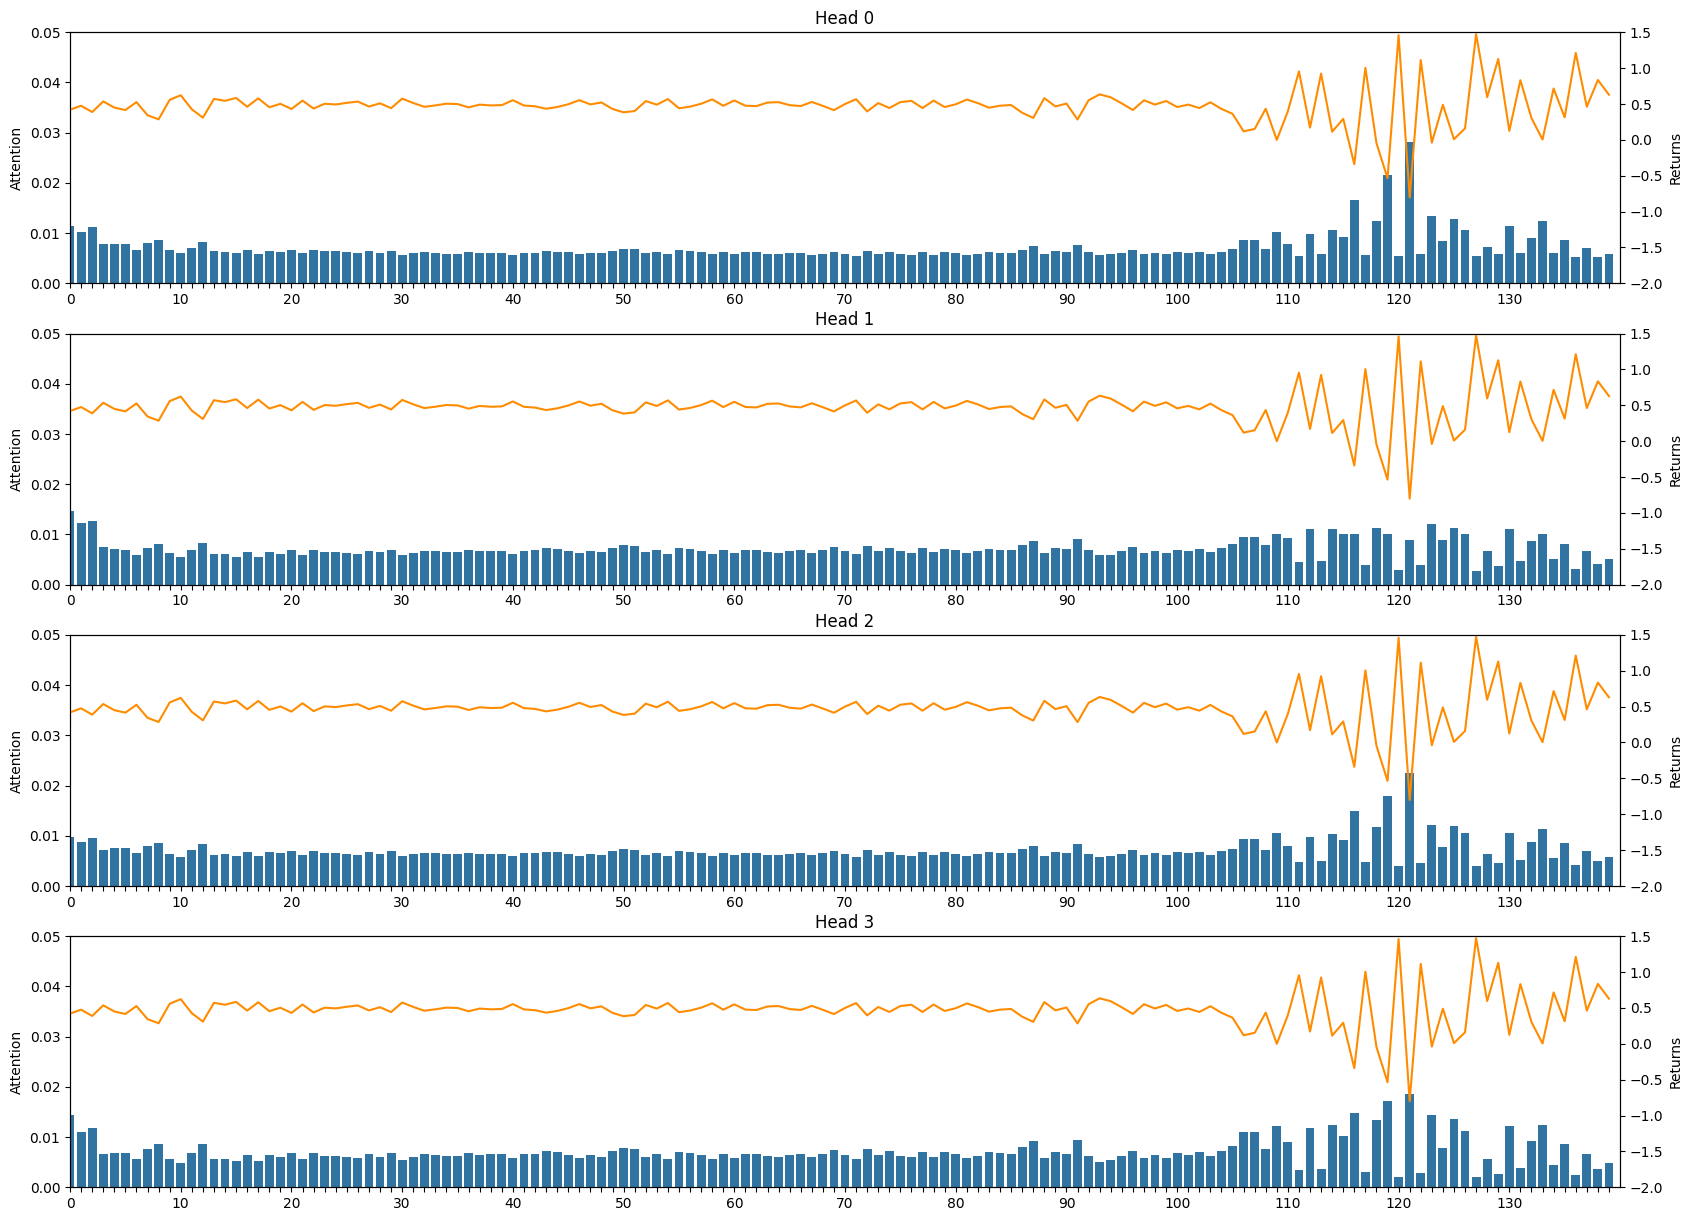

In [608]:
tft.load_state_dict(tft_weights_covid_good)
xcg, attn, mask = tft.forward(s, r)

f, ax = plt.subplots(4)

f.set_figheight(15)
f.set_figwidth(20)

for i in range(4):
    a = sns.barplot(attn[i][0][-1].to('cpu').detach().numpy().squeeze(), ax=ax[i])
    a2 = a.twinx()
    a3 = sns.lineplot(r[0].to('cpu').detach().numpy().squeeze(), ax=a2, color='darkorange')

    a.set_ybound(0, 0.05)
    a3.set_ybound(-2, 1.5)
    a.set_xbound(0, 140)
    a3.set_ylabel('Returns')
    a.set_ylabel('Attention')

    a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
    a.set_title(f'Head {i}')

print(mask.mean(0))

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1230236726.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1230236726.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1230236726.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_6498/1230236726.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ti

tensor([[0.1793, 0.0271, 0.4920, 0.0254, 0.2763]], device='mps:0',
       grad_fn=<MeanBackward1>)


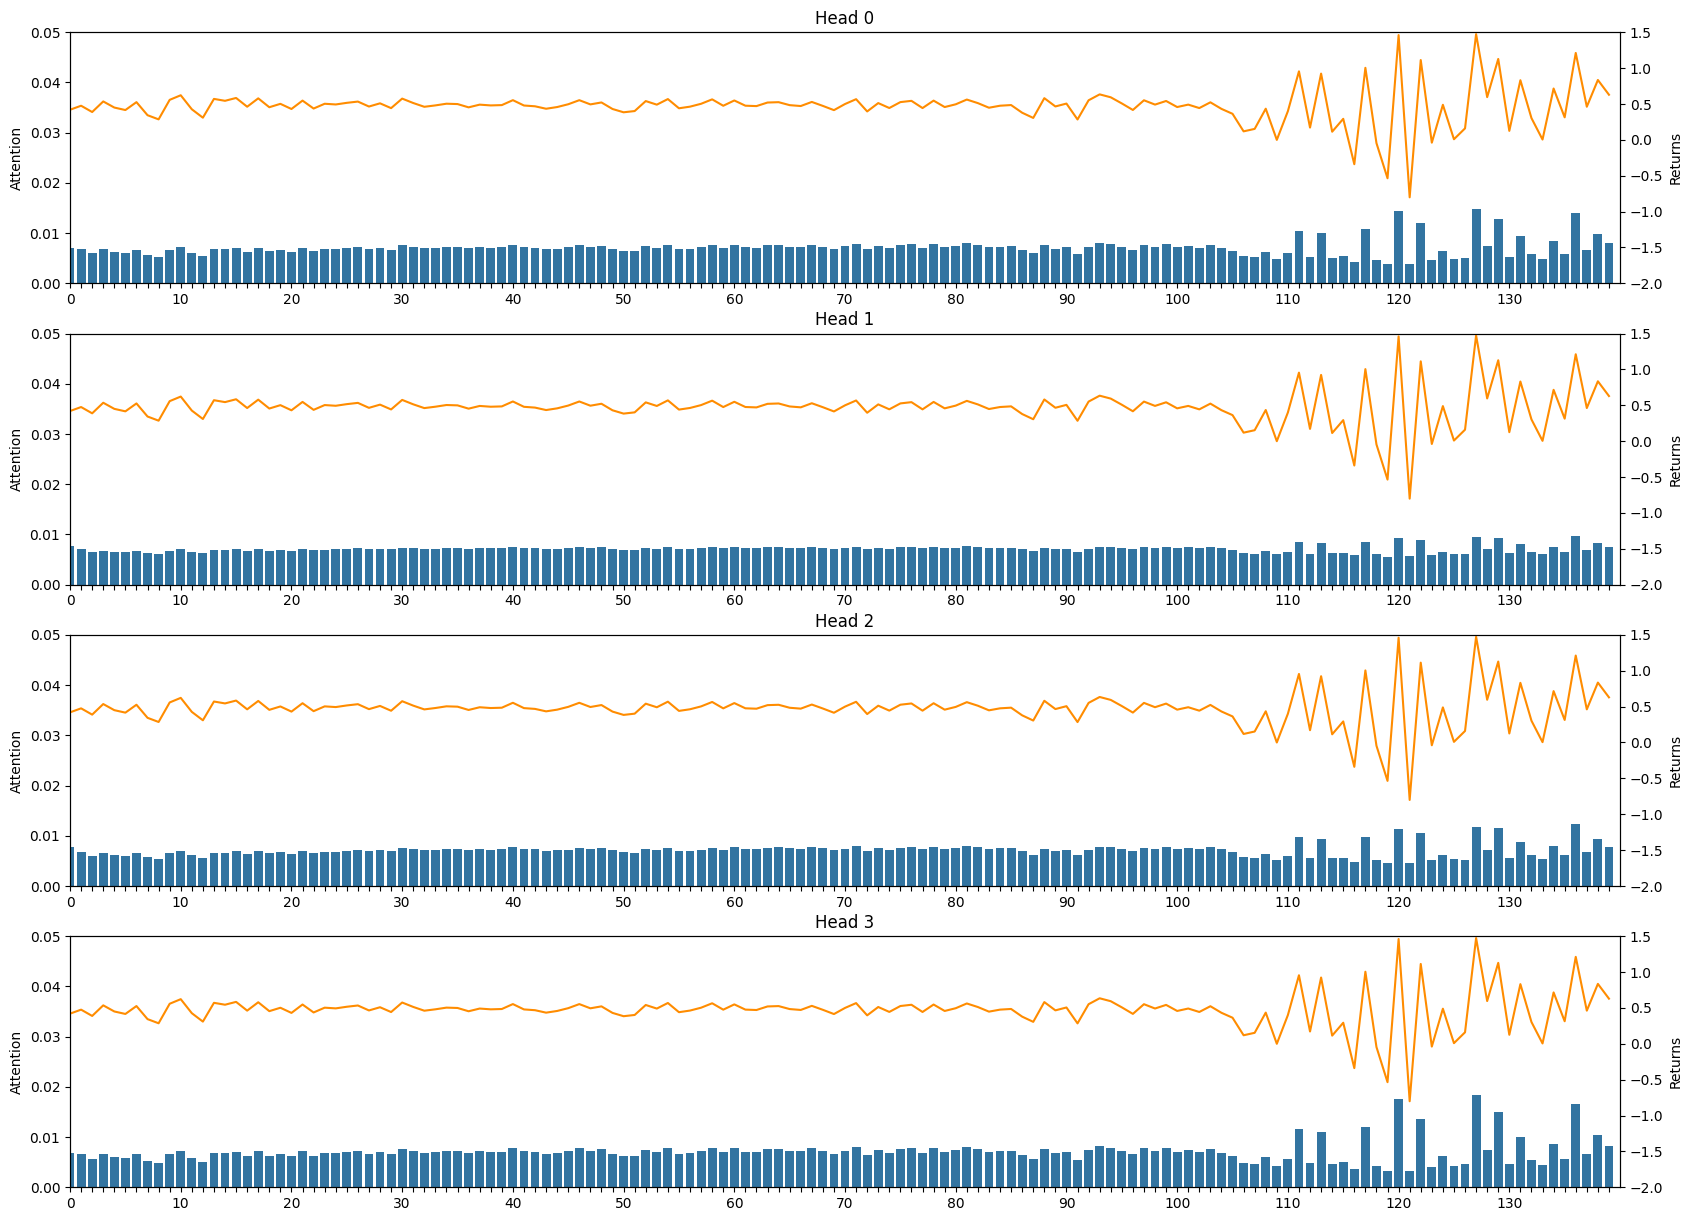

In [609]:
tft.load_state_dict(tft_weights_covid)
xc, attn, mask = tft.forward(s, r)

f, ax = plt.subplots(4)

f.set_figheight(15)
f.set_figwidth(20)

for i in range(4):
    a = sns.barplot(attn[i][0][-1].to('cpu').detach().numpy().squeeze(), ax=ax[i])
    a2 = a.twinx()
    a3 = sns.lineplot(r[0].to('cpu').detach().numpy().squeeze(), ax=a2, color='darkorange')

    a.set_ybound(0, 0.05)
    a3.set_ybound(-2, 1.5)
    a.set_xbound(0, 140)
    a3.set_ylabel('Returns')
    a.set_ylabel('Attention')

    a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
    a.set_title(f'Head {i}')

print(mask.mean(0))

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/94237400.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/94237400.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/94237400.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/94237400.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

tensor([[0.0401, 0.8079, 0.0469, 0.0196, 0.0856]], device='mps:0')


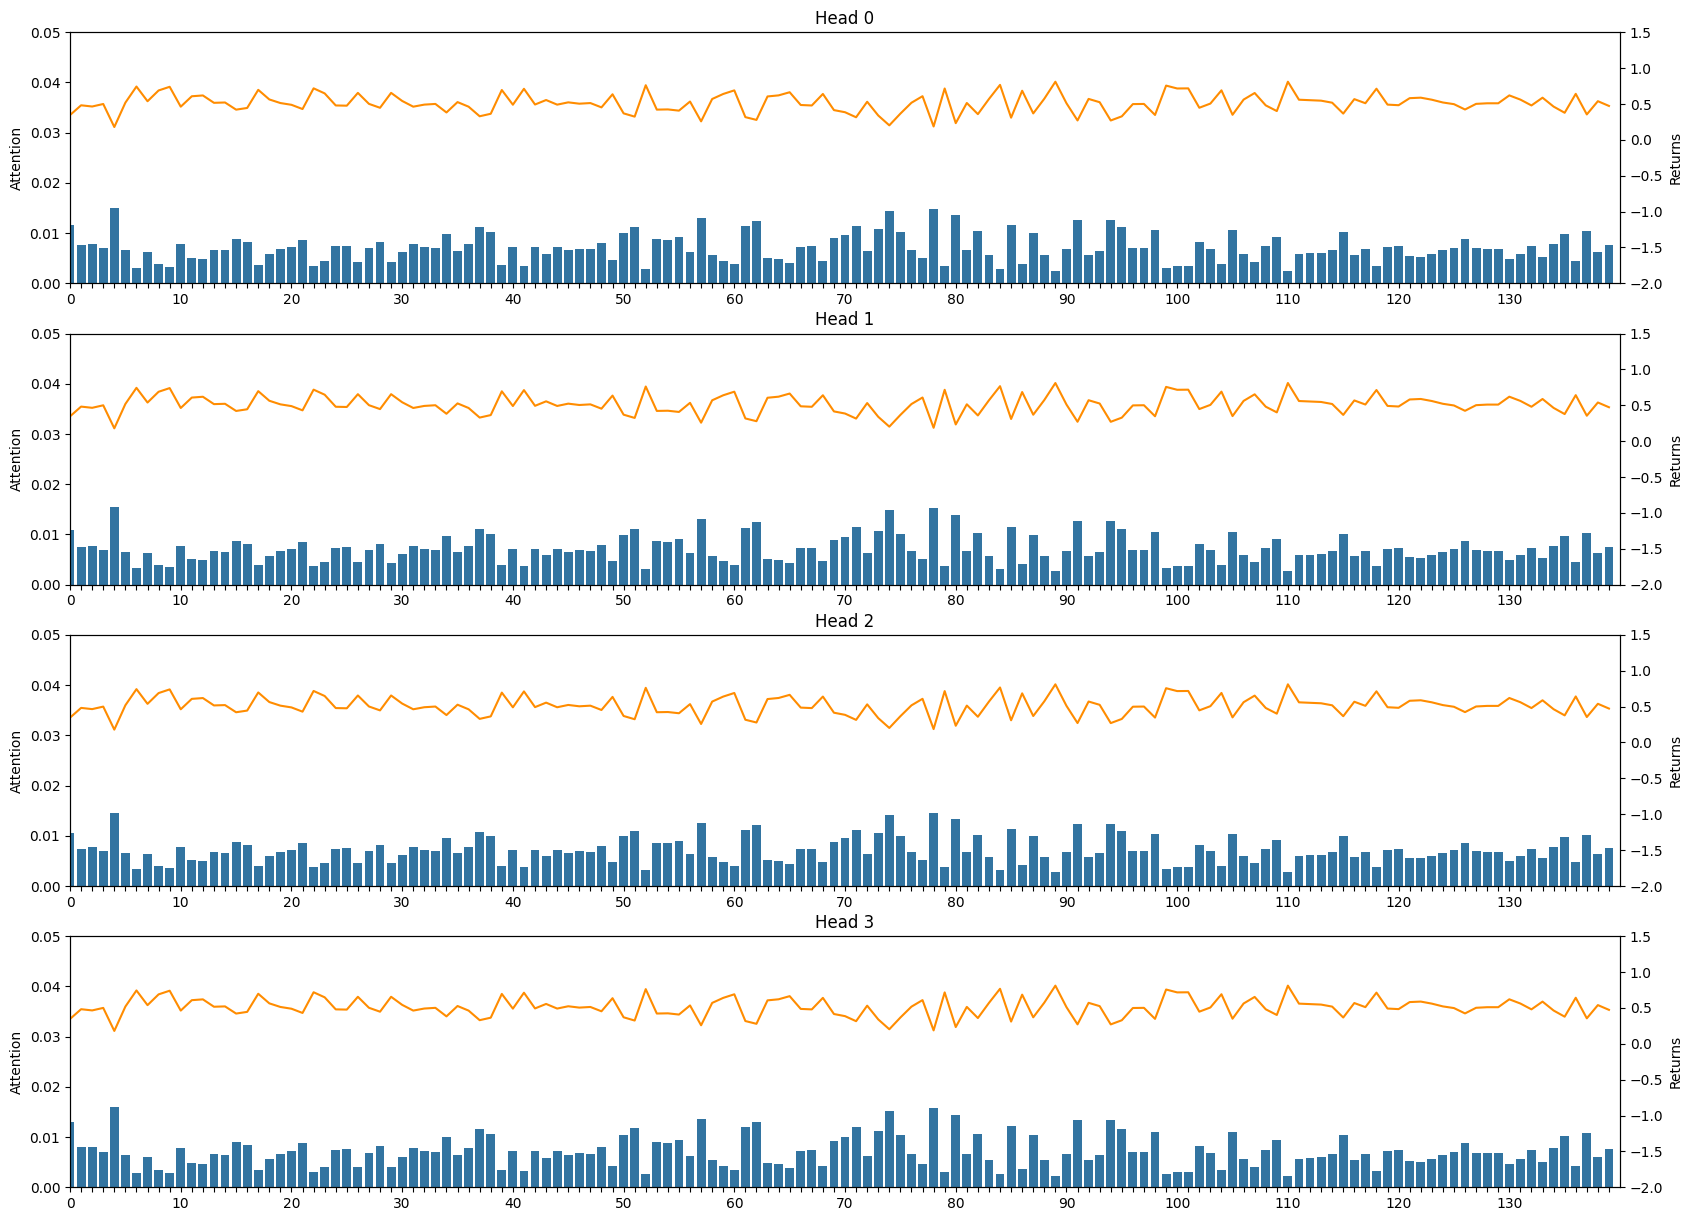

In [10]:
tft.load_state_dict(tft_weights)
with torch.no_grad():
    x, attn, mask = tft.forward(s, r)

f, ax = plt.subplots(4)

f.set_figheight(15)
f.set_figwidth(20)

for i in range(4):
    a = sns.barplot(attn[i][0][-1].to('cpu').detach().numpy().squeeze(), ax=ax[i])
    a2 = a.twinx()
    a3 = sns.lineplot(r[0].to('cpu').detach().numpy().squeeze(), ax=a2, color='darkorange')

    a.set_ybound(0, 0.05)
    a3.set_ybound(-2, 1.5)
    a.set_xbound(0, 140)
    a3.set_ylabel('Returns')
    a.set_ylabel('Attention')

    a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
    a.set_title(f'Head {i}')

print(mask.mean(0))

/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/28378408.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/28378408.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/28378408.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
/var/folders/4h/wb36ylt17sj6v882tp7lx6140000gn/T/ipykernel_42444/28378408.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks,

tensor([[0.1207, 0.3562, 0.4208, 0.0279, 0.0744]], device='mps:0')


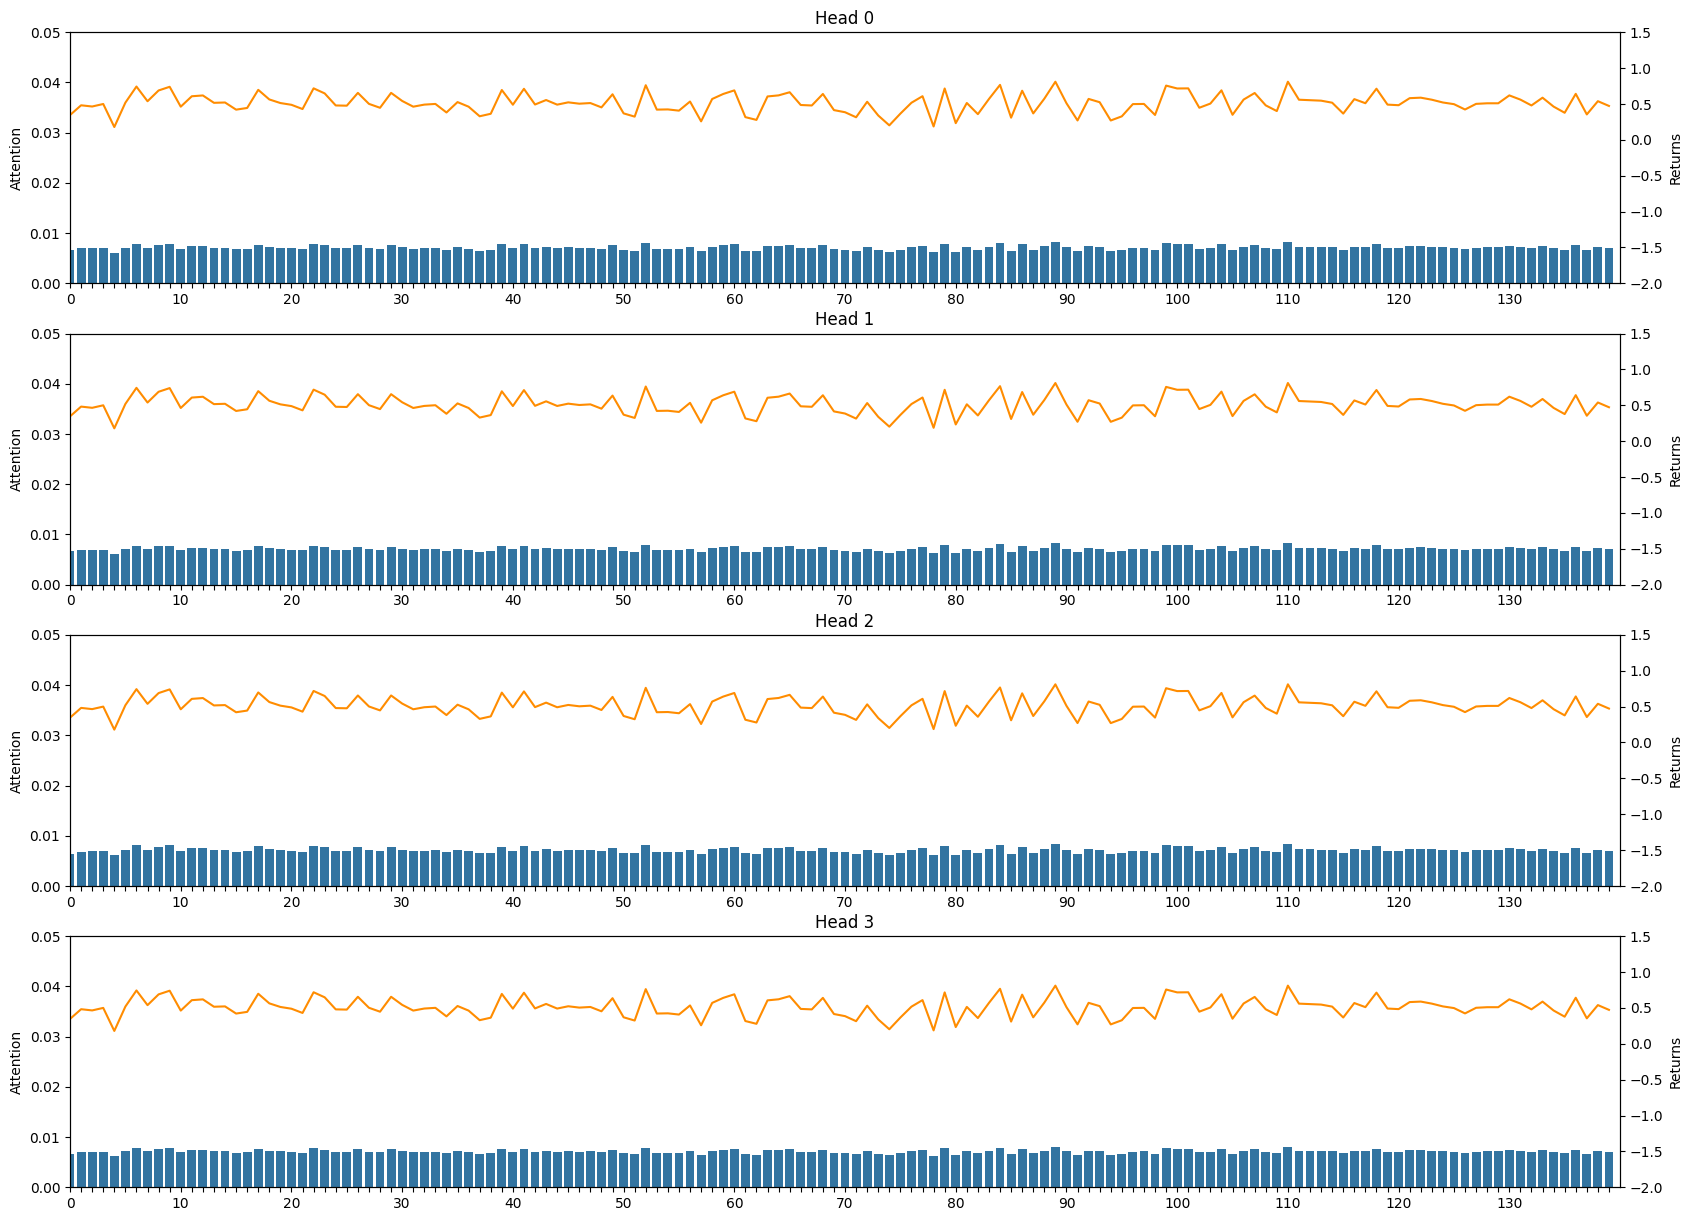

In [11]:
tft.load_state_dict(tft_weights_good)
with torch.no_grad():
    xg, attn, mask = tft.forward(s, r)

f, ax = plt.subplots(4)

f.set_figheight(15)
f.set_figwidth(20)

for i in range(4):
    a = sns.barplot(attn[i][0][-1].to('cpu').detach().numpy().squeeze(), ax=ax[i])
    a2 = a.twinx()
    a3 = sns.lineplot(r[0].to('cpu').detach().numpy().squeeze(), ax=a2, color='darkorange')

    a.set_ybound(0, 0.05)
    a3.set_ybound(-2, 1.5)
    a.set_xbound(0, 140)
    a3.set_ylabel('Returns')
    a.set_ylabel('Attention')

    a.set_xticklabels([str(x) if x%10 == 0 else '' for x in range(140)])
    a.set_title(f'Head {i}')

print(mask.mean(0))

In [612]:
x = x*(c.max() - c.min()) + c.min()
xc = xc*(c.max() - c.min()) + c.min()
xg = xg*(c.max() - c.min()) + c.min()
xcg = xcg*(c.max() - c.min()) + c.min()

In [615]:
s, t

(tensor([[6.6421e-01, 5.8095e-01, 2.2973e-05, 5.4780e-05, 1.2159e-05]],
        device='mps:0'),
 tensor([383.8500], device='mps:0'))

In [613]:
[x - t, xg - t, xc - t, xcg - t]

[tensor([-308.5329], device='mps:0', grad_fn=<SubBackward0>),
 tensor([-275.4651], device='mps:0', grad_fn=<SubBackward0>),
 tensor([-330.0213], device='mps:0', grad_fn=<SubBackward0>),
 tensor([-320.1809], device='mps:0', grad_fn=<SubBackward0>)]

In [513]:
mask.mean(0)

tensor([[0.1216, 0.3789, 0.3970, 0.0287, 0.0738]], device='mps:0',
       grad_fn=<MeanBackward1>)

In [496]:
data = [[0.4369, 0.0461, 0.3548, 0.0391, 0.1231],
 [0.1240, 0.4018, 0.3717, 0.0291, 0.0734],
 [0.0393, 0.7914, 0.0464, 0.0198, 0.1031]]

In [497]:
var_importance = pd.DataFrame(data, columns=['UNDERLYING_LAST', 'STRIKE', 'TTM', 'RISK_FREE_RATE', '30RV'])

In [501]:
print(var_importance.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrr}
\toprule
 & UNDERLYING_LAST & STRIKE & TTM & RISK_FREE_RATE & 30RV \\
\midrule
0 & 0.437 & 0.046 & 0.355 & 0.039 & 0.123 \\
1 & 0.124 & 0.402 & 0.372 & 0.029 & 0.073 \\
2 & 0.039 & 0.791 & 0.046 & 0.020 & 0.103 \\
\bottomrule
\end{tabular}



In [518]:
tft.load_state_dict(tft_weights_good)

<All keys matched successfully>

In [13]:
attn.shape

torch.Size([1, 1000, 240, 240])

<Axes: >

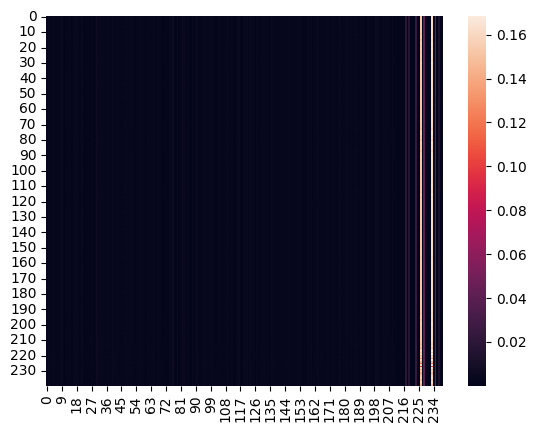

In [14]:
sns.heatmap(attn.mean(1).to('cpu').detach().numpy().squeeze())

In [516]:
mask.mean(0)

tensor([[0.0411, 0.8024, 0.0467, 0.0194, 0.0904]], device='mps:0',
       grad_fn=<MeanBackward1>)

In [4]:
from sub_modules import ContinuesEmbedding
from sub_modules import GateAndNorm
from sub_modules import GRNNoContext
from sub_modules import InterpretableMultiHeadAttention
from sub_modules import LSTMEncoder
from sub_modules import StaticEnrichment
from sub_modules import StaticVarEncoder
from sub_modules import StaticVarSelection


class TFT(torch.nn.Module):
    def __init__(
        self,
        dimensions: int,
        no_static_features: int,
        dropout: float,
        num_heads: int = 1,
        lstm_layers: int = 1,
        *args,
        **kwargs,
    ) -> None:
        super().__init__(*args, **kwargs)
        self.static_embedding = ContinuesEmbedding(dimensions)
        self.temporal_embedding = ContinuesEmbedding(dimensions)
        self.static_var_selection = StaticVarSelection(no_static_features, dimensions, dropout)
        self.static_enc = StaticVarEncoder(dimensions, dropout)
        self.temporal_encoder = LSTMEncoder(dimensions, dropout, lstm_layers)
        self.static_enrichment = StaticEnrichment(dimensions, dropout)
        self.attention = InterpretableMultiHeadAttention(num_heads, dimensions, dropout)
        self.grn = GRNNoContext(dimensions, dropout)
        self.add_norm_after_attention = GateAndNorm(dimensions)
        self.add_norm_final = GateAndNorm(dimensions)
        self.w_o = torch.nn.Linear(dimensions, 1)
        self.relu = torch.nn.ReLU()

    def get_mask(self, s):
        statics = self.static_embedding(s)
        _, mask = self.static_var_selection(statics)
        return mask

    def forward(self, statics, temporal):
        statics = self.static_embedding(statics)
        temporal = self.temporal_embedding(temporal)

        statics, mask = self.static_var_selection(statics)

        c_s, c_c, c_h, c_e = self.static_enc(statics)
        encoded = self.temporal_encoder(temporal, c_s, c_c, c_h)
        x = self.static_enrichment(encoded, c_e)
        head, attn = self.attention(x, x, x)
        x = self.add_norm_after_attention(head, x)
        x = self.grn(x)
        x = self.add_norm_final(x, encoded)
        x = x[:, -1, :].squeeze()
        x = self.w_o(x)
        if not self.training:
            x = self.relu(x)
        return x, attn, mask

In [5]:
tft = TFT(64, 5, 0, 4, 2)

In [41]:
samples = df[['S', 'K', 'T', 'r', '30RV']].sample(1000000).to_numpy(dtype="float32")

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
samples = torch.tensor(scaler.fit_transform(samples))

In [43]:
tft.load_state_dict(tft_weights)
with torch.no_grad():
    mask = tft.get_mask(samples)

In [44]:
mask = mask.mean(axis=0)[0].numpy()

In [45]:
tft.load_state_dict(tft_weights_good)
with torch.no_grad():
    maskg = tft.get_mask(samples)

In [46]:
maskg = maskg.mean(axis=0)[0].numpy()

In [47]:
tft.load_state_dict(tft_weights_covid)
with torch.no_grad():
    maskc = tft.get_mask(samples)

In [48]:
maskc = maskc.mean(axis=0)[0].numpy()

In [71]:
tft.load_state_dict(tft_weights_covid_good)
with torch.no_grad():
    maskcg = tft.get_mask(samples)

In [72]:
maskcg = maskcg.mean(axis=0)[0].numpy()

In [73]:
data = np.array([mask, maskg, maskc, maskcg])

In [74]:
var_importance = pd.DataFrame(data, columns=['UNDERLYING_LAST', 'STRIKE', 'TTM', 'RISK_FREE_RATE', '30RV'])

In [75]:
print(var_importance.to_latex(float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
 & UNDERLYING_LAST & STRIKE & TTM & RISK_FREE_RATE & 30RV \\
\midrule
0 & 0.0724 & 0.7628 & 0.0626 & 0.0168 & 0.0855 \\
1 & 0.1217 & 0.4468 & 0.3304 & 0.0322 & 0.0689 \\
2 & 0.2638 & 0.0408 & 0.4730 & 0.0231 & 0.1992 \\
3 & 0.2393 & 0.1295 & 0.0913 & 0.0151 & 0.5248 \\
\bottomrule
\end{tabular}

